Import the relevant libraries.

Hint: You need to import matplotlib.pyplot instaed of matplotlib.

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load in the csv file. Make sure to df.head() to ensure it is valid.

In [59]:
df = pd.read_csv('/content/drive/MyDrive/MDST/UberDataset Current.csv')
df.head()

,Unnamed: 0,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,hour,day_of_week,...,TEMPERATURE,IS_DAY,RAIN,SNOWFALL,SHOWERS,WEATHER_CODE,WIND_SPEED_10M,WIND_GUSTS_10M,TEMP_WIND,WEATHER_STRESS
0,0,2016-11-05 19:20:00,2016-11-05 19:28:00,Business,Agnew,Agnew,2.2,NO_DATA,19,5,...,49.3,0.0,0.0,0.0,0.0,1.0,4.0,5.0,197.20,59.3
1,1,2016-11-04 22:12:00,2016-11-04 22:25:00,Business,Cory,Agnew,3.9,NO_DATA,22,4,...,41.6,0.0,0.0,0.0,0.0,0.0,6.2,13.3,257.92,61.1
2,2,2016-11-05 17:29:00,2016-11-05 17:40:00,Business,Renaissance,Agnew,2.8,NO_DATA,17,5,...,52.5,0.0,0.0,0.0,0.0,1.0,7.0,14.8,367.50,75.3
3,3,2016-11-06 16:05:00,2016-11-06 16:22:00,Business,Renaissance,Agnew,2.8,Meeting,16,6,...,43.9,1.0,0.0,0.0,0.0,0.0,16.3,34.6,715.57,94.8
4,4,2016-03-17 17:20:00,2016-03-17 18:02:00,Business,Midtown,Alief,15.5,Meal/Entertain,17,3,...,50.9,1.0,0.0,0.0,0.0,3.0,6.8,28.1,346.12,88.8


1. Look in the 'CATEGORY' tab. Create a sum of the miles for each category, and then graph it as a bar chart.

Text(0.5, 0, 'Category')

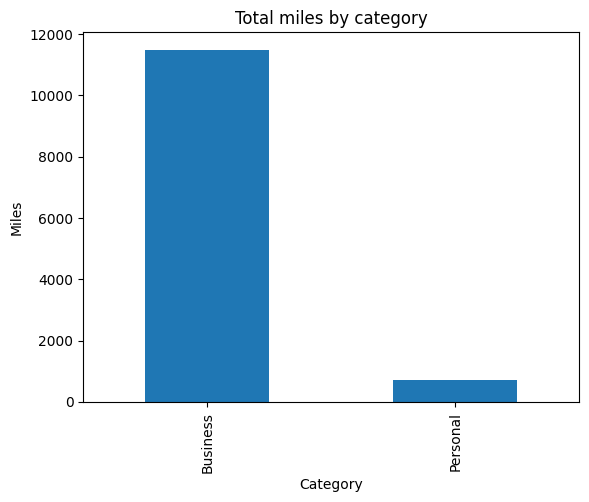

In [60]:
x = df.groupby('CATEGORY')['MILES'].sum()
x.plot(kind='bar')
plt.title('Total miles by category')
plt.ylabel('Miles')
plt.xlabel('Category')

2. Similarily, aggregate the number of rides that occured on each day of the week. Plot it on a bar chart.

Text(0.5, 0, 'Day of week')

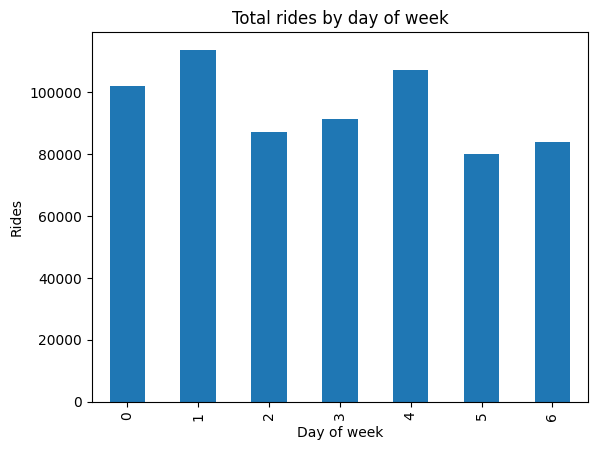

In [61]:
df.groupby('day_of_week')['Unnamed: 0'].sum().plot(kind='bar')
plt.title('Total rides by day of week')
plt.ylabel('Rides')
plt.xlabel('Day of week')

3. Calculate the mean of all the ride durations, in minutes.

Similarily, find the mean of the mileage of all rides.

In [62]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])
df['DURATION'] = df['END_DATE'] - df['START_DATE']
df['DURATION'] = df['DURATION'].dt.total_seconds() / 60
print(df['DURATION'].mean())

print(df['MILES'].mean())



23.250433275563257
10.57313691507799


4. To better understand if these stats can be reprsentative, let's see if we have extreme values. Calculate the extreme values via IQR.

Q1 = df[column].quantile(0.25)

Q3 = df[column].quantile(0.75)

IQR = Q3 - Q1

Lower bound = Q1 - 1.5 * IQR

Upper bound = Q3 + 1.5 * IQR

In [63]:
from re import I
Q1 = df['DURATION'].quantile(0.25)
Q3 = df['DURATION'].quantile(0.75)
IQR = Q3 - Q1
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
print(Lower_bound)
print(Upper_bound)

-16.625
54.375


In [64]:
Q1 = df['MILES'].quantile(0.25)
Q3 = df['MILES'].quantile(0.75)
IQR = Q3 - Q1
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
print(Lower_bound)
print(Upper_bound)

-8.35
21.65


5. Do the same thing as above, only this time find the outliers for hours.

In [67]:
Q1 = df['DURATION'].quantile(0.25)
Q3 = df['DURATION'].quantile(0.75)
IQR = Q3 - Q1
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
print(Lower_bound)
print(Upper_bound)

x = df[(df['DURATION'] < Lower_bound) | (df['DURATION'] > Upper_bound)]
print(x['DURATION'])

-16.625
54.375
27       73.0
28      114.0
36      206.0
46       67.0
54       61.0
        ...  
1015     62.0
1035     58.0
1041     70.0
1062     67.0
1153    126.0
Name: DURATION, Length: 62, dtype: float64


6. To better understand the distribution of mileage between days of the week, create a matrix table to visually represent the dataset. Three columns should be considered: day_of_week, CATEGORY, and MILES.

Hint: Use df.pivot_table()



In [68]:
df.pivot_table(index='day_of_week', columns='CATEGORY', values='MILES', aggfunc='sum')

CATEGORY,Business,Personal
day_of_week,,
0,1309.6,77.8
1,1401.2,80.5
2,1205.4,44.5
3,1780.9,37.1
4,2512.0,79.7
5,1790.7,185.6
6,1483.9,212.5


7. Find the most active routes, and print the first 5. In other words, find the most frequent instances of going from one place to another.

8. Create a scatterplot that graphs between two variables: Duration and Miles

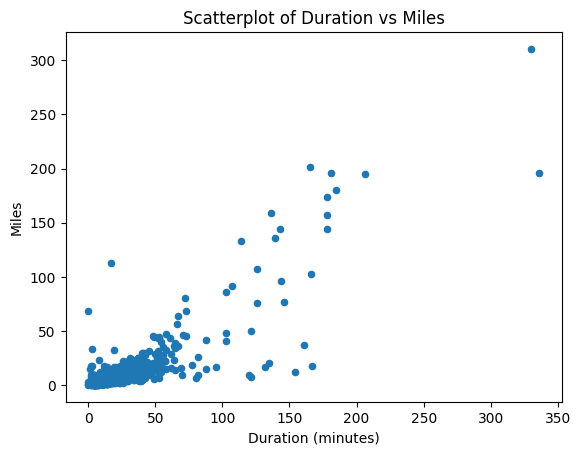

In [75]:
df.plot(kind='scatter', x='DURATION', y='MILES')
plt.title('Scatterplot of Duration vs Miles')
plt.xlabel('Duration (minutes)')
plt.ylabel('Miles')
plt.show()

9. Create a histogram that represents the frequency of trips based on duration. Please remember to use a reasonable number of bins in your histogram plot.

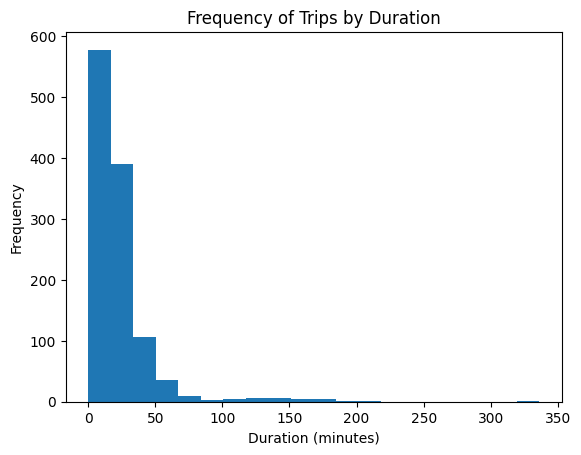

In [78]:
df['DURATION'].plot(kind='hist', bins=20)
plt.title('Frequency of Trips by Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

10. Lastly, please create a piechart to visualize the days with/without rain. For the days that are rainy, call it "rainy". For the days that are not rainy, call it "dry".

Thanks for attending this week's session! :-)

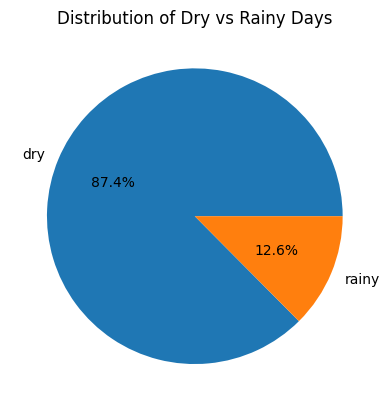

In [87]:
# Categorize RAIN into 'dry' and 'rainy'
rain_status = df['RAIN'].apply(lambda x: 'rainy' if x > 0 else 'dry')

# Plot the value counts
rain_status.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Dry vs Rainy Days')
plt.ylabel('') # Hides the column name label for a cleaner look
plt.show()